In [ ]:
import numpy as np
import astropy
#import astroquery as atr
from astropy.io import fits
from astropy.constants import G
from astropy import units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp




In [ ]:
data = pd.read_csv('andromeda-result.csv')
data

,source_id,ra,dec,parallax,pmra,pmdec,radial_velocity
0,387310087645581056,11.195908,41.891744,NaN,NaN,NaN,NaN
1,387309567953910528,11.245223,41.818567,0.890763,-3.097033,-1.264136,NaN
2,387309567953910656,11.237133,41.819687,0.172792,12.665567,11.119190,NaN
3,387309567953911680,11.234690,41.832849,NaN,NaN,NaN,NaN
4,387309572249452416,11.243529,41.815742,2.555638,0.137134,-2.903733,NaN
...,...,...,...,...,...,...,...
1995,387318020449853056,11.019636,42.167097,0.162356,-0.978155,0.124523,NaN
1996,387318020456882432,11.037540,42.159767,NaN,NaN,NaN,NaN
1997,387318054816521600,11.025894,42.177409,0.371277,1.554406,-2.519890,NaN
1998,387318059106689152,11.038700,42.173898,NaN,NaN,NaN,NaN


In [ ]:
data = data.drop('radial_velocity',axis=1)
data

,source_id,ra,dec,parallax,pmra,pmdec
0,387310087645581056,11.195908,41.891744,NaN,NaN,NaN
1,387309567953910528,11.245223,41.818567,0.890763,-3.097033,-1.264136
2,387309567953910656,11.237133,41.819687,0.172792,12.665567,11.119190
3,387309567953911680,11.234690,41.832849,NaN,NaN,NaN
4,387309572249452416,11.243529,41.815742,2.555638,0.137134,-2.903733
...,...,...,...,...,...,...
1995,387318020449853056,11.019636,42.167097,0.162356,-0.978155,0.124523
1996,387318020456882432,11.037540,42.159767,NaN,NaN,NaN
1997,387318054816521600,11.025894,42.177409,0.371277,1.554406,-2.519890
1998,387318059106689152,11.038700,42.173898,NaN,NaN,NaN


In [ ]:
data=data.dropna()
data

,source_id,ra,dec,parallax,pmra,pmdec
1,387309567953910528,11.245223,41.818567,0.890763,-3.097033,-1.264136
2,387309567953910656,11.237133,41.819687,0.172792,12.665567,11.119190
4,387309572249452416,11.243529,41.815742,2.555638,0.137134,-2.903733
6,387309572249703808,11.239831,41.818960,-2.060317,0.829693,-2.254902
7,387309572251335552,11.244594,41.814129,-2.215032,1.255609,-2.152162
...,...,...,...,...,...,...
1991,387317887307311360,11.020624,42.132229,1.788597,-2.507046,3.216497
1992,387317917370621184,11.020997,42.151023,0.721247,-1.274504,-5.044660
1995,387318020449853056,11.019636,42.167097,0.162356,-0.978155,0.124523
1997,387318054816521600,11.025894,42.177409,0.371277,1.554406,-2.519890


In [ ]:
# Extract the celestial coordinates (RA, Dec)
ra = data['ra']#*u.deg
dec = data['dec']#*u.deg
ra_rad=ra*(np.pi/180)
dec_rad=dec*(np.pi/180)

# Create a SkyCoord object with the given coordinates
coords = SkyCoord(ra=ra, dec=dec,unit=(u.deg,u.deg), frame='icrs')

# Convert the celestial coordinates to Cartesian coordinates (X, Y, Z)
cartesian_coords = coords.represent_as(CartesianRepresentation)

# Extract the X, Y, Z coordinates
x = cartesian_coords.x/1000#u.kpc
y = cartesian_coords.y/1000#u.kpc
z = cartesian_coords.z/1000#u.kpc

# Print the Cartesian coordinates
print("X: ", x)
print("Y: ", y)
print("Z: ", z)

X:  [0.00073095 0.00073096 0.00073099 ... 0.00072752 0.00072739 0.00072782]
Y:  [0.00014533 0.00014523 0.00014532 ... 0.00014168 0.00014173 0.00014152]
Z:  [0.00066677 0.00066679 0.00066674 ... 0.0006713  0.00067143 0.00067101]


In [ ]:
#Obtaining the proper momentum
pmra=data['pmra']#*u.mas*u.m/u.year
pmdec=data['pmdec']#*u.mas*u.m/u.year
parallax=data['parallax']#*u.mas
distance=(1.0/parallax)#*u.m
# Convert the proper motions from milliarcseconds per year (mas/yr) to radians per year (rad/yr)
pmra_rad = pmra * (parallax*4*np.pi)#*u.rad
pmdec_rad = pmdec * (parallax*4*np.pi)#*u.rad
# Calculate the Cartesian momentum components (v_x, v_y)
p_x = pmra_rad * (distance/ 3.0857e19)#/(u.rad*u.yr)
p_y = pmdec_rad * (distance/ 3.0857e19)#/(u.rad*u.yr)
# Assign the radial velocity as the v_z component
p_z = np.sqrt(pmra_rad**2+pmdec_rad**2)

print("p_x: ", p_x)
print("p_y: ", p_y)
print("p_z: ", p_z)


p_x:  1      -1.261252e-18
2       5.157994e-18
4       5.584711e-20
6       3.378885e-19
7       5.113408e-19
            ...     
1991   -1.020983e-18
1992   -5.190359e-19
1995   -3.983493e-19
1997    6.330245e-19
1999   -1.854244e-18
Length: 1516, dtype: float64
p_y:  1      -5.148137e-19
2       4.528239e-18
4      -1.182532e-18
6      -9.182985e-19
7      -8.764582e-19
            ...     
1991    1.309904e-18
1992   -2.054414e-18
1995    5.071160e-20
1997   -1.026214e-18
1999   -1.760179e-18
Length: 1516, dtype: float64
p_z:  1       37.443840
2       36.595989
4       93.357613
6       62.207628
7       69.355055
          ...    
1991    91.660743
1992    47.158659
1995     2.011759
1997    13.813665
1999    37.398362
Length: 1516, dtype: float64


In [ ]:
#Definiendo Potencial
def bulge_potential(x, y, z, M_bulge, a_bulge):
    denominator = x ** 2 + y ** 2 + z ** 2 + a_bulge ** 2
    potential0 = -G.value * M_bulge / np.sqrt(denominator)
    potential = np.where(np.isnan(potential0), 0.0, potential0)
    return potential

# Define the parameters for each component
M_bulge = 2.2e10 #*u.Msun  # Mass of the bulge (example value)
a_bulge = 1.3#u.kpc)  # Scale length of the bulge (example value)

# Calculate the potentials for each component
bulge_p = bulge_potential(x,y,z, M_bulge, a_bulge)
bulge_p

<Quantity [-1.12949659, -1.12949659, -1.12949659, ..., -1.12949659,
           -1.12949659, -1.12949659]>

In [ ]:
#Defining Hamiltonian
Omega= 0.23#*u.kpc/u.s
H=0.5*(p_x**2+p_y**2+p_z**2)+bulge_p-Omega*(x*p_y-y*p_x)


In [ ]:
# Define the symbolic variables
x1, y1, z1,M_bulge1, a_bulge1 = sp.symbols('x y z  M_bulge a_bulge')
# Define the expression for T
r = sp.sqrt(x1**2 + y1**2)
T = - G.value * M_bulge1 / sp.sqrt(x1**2 + y1**2 + z1**2 + a_bulge1**2)\

# Compute the symbolic derivative of T with respect to r
derivative_T = T.diff(z1)

# Simplify the derivative expression
#derivative_T_simplified = sp.simplify(derivative_T)

# Print the simplified derivative expression
print("Derivative of T with respect to r:")
print(derivative_T)


Derivative of T with respect to r:
6.6743e-11*M_bulge*z/(a_bulge**2 + x**2 + y**2 + z**2)**(3/2)


In [ ]:
# Initialize the state
state_prev = [x, y, z, p_x, p_y, p_z]
# Initialize GALI2 index
gali2_prev = 1.0

# Define the symbolic variables
#x, y, z, p_x, p_y, p_z = sp.symbols('x y z p_x p_y p_z')

# Define the equations of motion as a lambda function
# Define the equations of motion as a lambda function
equations_of_motion = lambda state: np.array([
    state[3] + Omega * state[1],
    state[4] - Omega * state[0],
    state[5],
    G.value*M_bulge*state[0]/(a_bulge**2 + state[0]**2 + state[1]**2 + state[2]**2)**(3/2)+Omega*y,\
    G.value*M_bulge*state[1]/(a_bulge**2 + state[0]**2 + state[1]**2 + state[2]**2)**(3/2)-Omega*x,\
    G.value*M_bulge*state[2]/(a_bulge**2 + state[0]**2 + state[1]**2 + state[2]**2)**(3/2)
])
equations_of_motion(state_prev)
#eq_motion= equations_of_motion(state_prev).dropnan(inplace=True)


array([[ 3.34263745e-05,  3.34020521e-05,  3.34228774e-05, ...,
         3.25852735e-05,  3.25982343e-05,  3.25496351e-05],
       [-1.68118989e-04, -1.68120767e-04, -1.68127394e-04, ...,
        -1.67330511e-04, -1.67299672e-04, -1.67398820e-04],
       [ 3.74438400e+01,  3.65959891e+01,  9.33576131e+01, ...,
         2.01175885e+00,  1.38136648e+01,  3.73983617e+01],
       [ 5.21951488e-04,  5.21932334e-04,  5.21972415e-04, ...,
         5.18819205e-04,  5.18742555e-04,  5.18982061e-04],
       [-7.09876441e-05, -7.10600992e-05, -7.10062109e-05, ...,
        -7.26432623e-05, -7.25747620e-05, -7.28151303e-05],
       [ 4.45632264e-04,  4.45641998e-04,  4.45607704e-04, ...,
         4.48653863e-04,  4.48743012e-04,  4.48460501e-04]])

In [ ]:
#Definiendo Rugen Kutta
def runge_kutta_integration(state, dt):
    k1 = dt * equations_of_motion(state)
    k2 = dt * equations_of_motion(state + 0.5 * k1)
    k3 = dt * equations_of_motion(state + 0.5 * k2)
    k4 = dt * equations_of_motion(state + k3)

    state_next = state + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
    return state_next

In [ ]:
t0 = 0.0
tmax = 1000.0
dt = 0.01
t_span = np.arange(t0, tmax, dt)
state = np.array([x, y, z, p_x, p_y, p_z])
gali2 = np.ones_like(t_span)
epsilon=1e-8

#state.shape

In [ ]:
t0 = 0.0
tmax = 10000.0
dt = 0.01
t_span = np.arange(t0, tmax, dt)
state = np.array([x, y, z, p_x, p_y, p_z])
gali2 = np.ones_like(t_span)
epsilon=1e-8

for t_idx, t in enumerate(t_span):
  perturbed_state = state + epsilon
  perturbed_trajectory = runge_kutta_integration(perturbed_state, dt)
  trajectory = runge_kutta_integration(state, dt)
  tangent_vectors = (perturbed_trajectory - trajectory) / epsilon

  # Compute the tangent vector
  #tangent_vector = equations_of_motion(state)

  # Compute the GALI2 index
  gali2[t_idx] += np.log(np.linalg.norm(tangent_vectors))/np.log(dt)

gali2


array([0.00855135, 0.00855135, 0.00855135, ..., 0.00855135, 0.00855135,
       0.00855135])

In [ ]:
np.log(gali2)

array([-4.76166574, -4.76166574, -4.76166574, ..., -4.76166574,
       -4.76166574, -4.76166574])

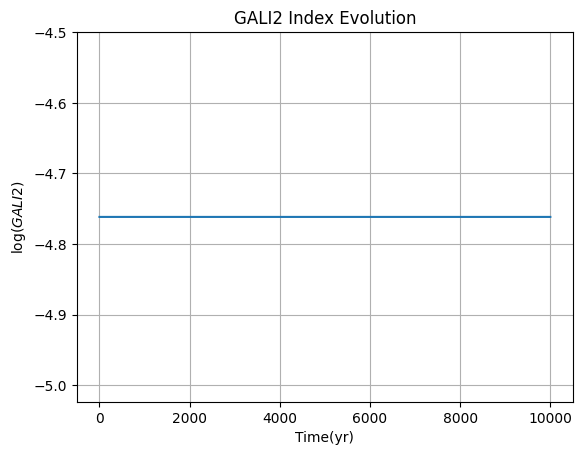

In [ ]:
# Plot the GALI2 index over time
plt.plot(t_span,np.log(gali2),'-')

plt.xlabel('Time(yr)')
plt.ylabel('$\log(GALI2)$')
plt.title('GALI2 Index Evolution')
plt.grid(True)
plt.savefig("gali2-andromeda.pdf")
plt.show()